In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler



In [139]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [147]:
news_data = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')

In [141]:
print(news_data.head())
print(stock_data.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [153]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', utc=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce',utc=True)



In [154]:
news_data['date'] = news_data['date'].dt.normalize()


In [155]:

# Align the datasets by performing an inner join on the date
aligned_data = news_data.join(stock_data, how='inner')

In [156]:
print(aligned_data.head(20))


    Unnamed: 0                                           headline  \
0            0            Stocks That Hit 52-Week Highs On Friday   
1            1         Stocks That Hit 52-Week Highs On Wednesday   
2            2                      71 Biggest Movers From Friday   
3            3       46 Stocks Moving In Friday's Mid-Day Session   
4            4  B of A Securities Maintains Neutral on Agilent...   
5            5  CFRA Maintains Hold on Agilent Technologies, L...   
6            6  UBS Maintains Neutral on Agilent Technologies,...   
7            7  Agilent Technologies shares are trading higher...   
8            8  Wells Fargo Maintains Overweight on Agilent Te...   
9            9         10 Biggest Price Target Changes For Friday   
10          10    30 Stocks Moving in Friday's Pre-Market Session   
11          11  SVB Leerink Maintains Outperform on Agilent Te...   
12          12  8 Stocks Moving In Thursday's After-Hours Session   
13          13  Agilent Technologi

In [157]:
# Drop rows with NaT values in the 'date' column for news data
news_data = news_data.dropna(subset=['date'])

# Drop rows with NaT values in the 'Date' column for stock data
stock_data = stock_data.dropna(subset=['Date'])

### Apply VADER Sentiment Analysis

In [164]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
news_data['sentiment_score'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label the sentiment as positive, negative, or neutral
news_data['sentiment_label'] = news_data['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

# View the first few rows with sentiment analysis
print(news_data[['headline', 'sentiment_score', 'sentiment_label']].head())


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4        Positive  


## Apply TextBlob Sentiment Analysis

In [165]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
news_data['sentiment_score'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label the sentiment as positive, negative, or neutral
news_data['sentiment_label'] = news_data['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

# View the first few rows with sentiment analysis
print(news_data[['headline', 'sentiment_score', 'sentiment_label']].head())


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4        Positive  


In [167]:
# Group by date and calculate average sentiment per day
daily_sentiment = news_data.groupby(news_data['date'].dt.date)['sentiment_score'].mean()

print(daily_sentiment.head(50))




date
2011-04-28    0.083333
2011-04-29    0.367550
2011-04-30    0.202300
2011-05-01    0.000000
2011-05-02    0.136444
2011-05-03    0.000000
2011-05-05   -0.042667
2011-05-06    0.067433
2011-05-07    0.000000
2011-05-08    0.636900
2011-05-09   -0.222933
2011-05-11    0.196667
2011-05-12    0.202300
2011-05-13    0.185475
2011-05-15    0.000000
2011-05-16    0.000000
2011-05-17   -0.034175
2011-05-18    0.000000
2011-05-19    0.000000
2011-05-20    0.296000
2011-05-22    0.101000
2011-05-23    0.226467
2011-05-24    0.053725
2011-05-25    0.285978
2011-05-26   -0.271150
2011-05-27   -0.113333
2011-05-29    0.533400
2011-05-30    0.000000
2011-05-31    0.135843
2011-06-01    0.232633
2011-06-02    0.000000
2011-06-03    0.158900
2011-06-06   -0.114350
2011-06-07    0.091887
2011-06-08    0.256050
2011-06-09    0.049171
2011-06-10    0.050067
2011-06-13    0.000000
2011-06-14    0.164540
2011-06-15   -0.014050
2011-06-16    0.194700
2011-06-17   -0.194557
2011-06-19    0.000000
2011-0

In [169]:
# Calculate the daily percentage change in closing prices
stock_data['daily_return'] = stock_data['Close'].pct_change() * 100

# Display the first few rows
print(stock_data[['Date', 'Close', 'daily_return']].head(10))

                       Date      Close  daily_return
0 2012-12-12 00:00:00+00:00  27.580000           NaN
1 2012-12-13 00:00:00+00:00  28.240000      2.393038
2 2012-12-14 00:00:00+00:00  26.809999     -5.063740
3 2012-12-17 00:00:00+00:00  26.750000     -0.223795
4 2012-12-18 00:00:00+00:00  27.709999      3.588782
5 2012-12-19 00:00:00+00:00  27.410000     -1.082639
6 2012-12-20 00:00:00+00:00  27.360001     -0.182412
7 2012-12-21 00:00:00+00:00  26.260000     -4.020469
8 2012-12-24 00:00:00+00:00  26.930000      2.551409
9 2012-12-26 00:00:00+00:00  26.510000     -1.559599


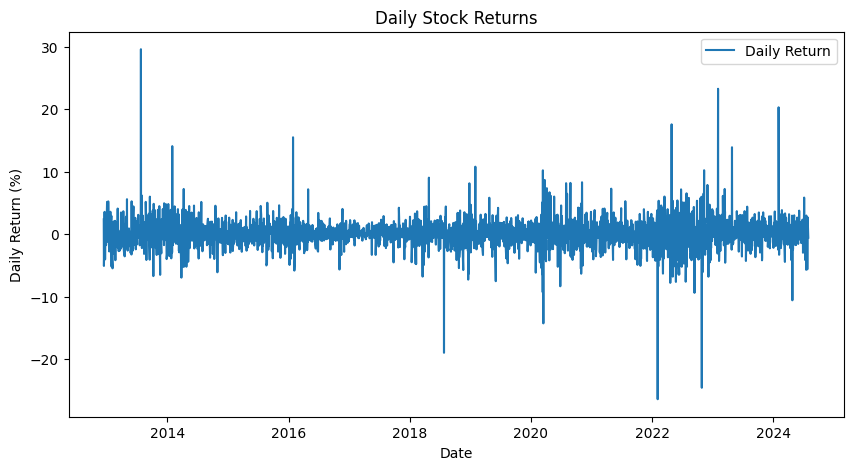

In [171]:


plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['daily_return'], label='Daily Return')
plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()
